# TITANIC SURVIVAL PREDICTION

**PROJECT OBJECTIVES :** The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank
after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board,
resulting in the death of 1502 out of 2224 passengers and crew.

**PROJECT GOAL :** Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or
not

# **Importing Libraries and data**

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [80]:
d=pd.read_csv("Titanic-Dataset.csv")
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Wrangling**

In [81]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
d.shape

(891, 12)

In [83]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
d["Age"].fillna(d["Age"].median(), inplace=True)
print(d["Age"])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [86]:
d["Age"].isnull().sum()

0

In [87]:
d.drop('Cabin', axis=1, inplace=True)  # Example of dropping

In [88]:
d['Embarked'].fillna(d['Embarked'].mode()[0], inplace=True)

In [89]:
d["Embarked"].isnull().sum()

0

# **Feature Engineering**

In [90]:
d['Title'] = d['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(d["Title"])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object


In [91]:
d1=d[~d["Title"].isin(["Mr","Mrs","Miss"])]
print(d1["Title"])

7      Master
16     Master
30        Don
50     Master
59     Master
        ...  
831    Master
848       Rev
850    Master
869    Master
886       Rev
Name: Title, Length: 67, dtype: object


In [92]:
print(d["Sex"].unique())

['male' 'female']


In [93]:
d['Sex'] = d['Sex'].str.lower().map({'male': 0, 'female': 1})
print(d["Sex"])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [94]:
print(d["Embarked"].unique())

['S' 'C' 'Q']


In [95]:
d["Embarked"]=d["Embarked"].map({"C":0,"Q":1,"S":2})
print(d["Embarked"])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [96]:
d.drop(['PassengerId', 'Name', 'Title', 'Ticket'], axis=1, inplace=True)

# Split Data and Model Selection

In [97]:
from sklearn.model_selection import train_test_split

# Define features and target
X = d.drop('Survived', axis=1)
y = d['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [99]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



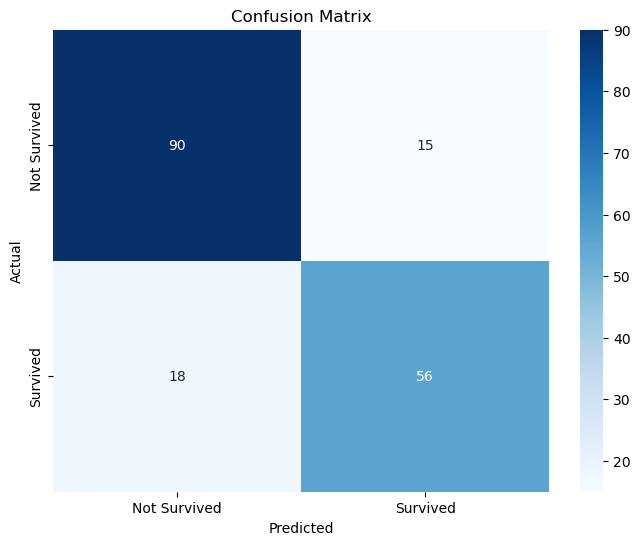

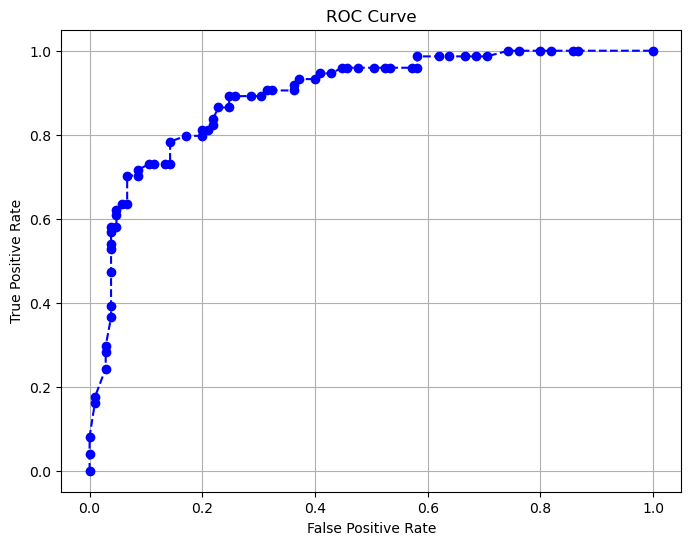

AUC Score: 0.8945302445302445


In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

# ROC AUC Score
print("AUC Score:", roc_auc_score(y_test, y_proba))

# Model Tuning

In [101]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}


In [102]:
# Retrain the final model on the entire dataset
final_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
final_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [103]:
import joblib

# Save the model
joblib.dump(final_model, 'titanic_survival_model.pkl')

# Load the model (if needed later)
loaded_model = joblib.load('titanic_survival_model.pkl')

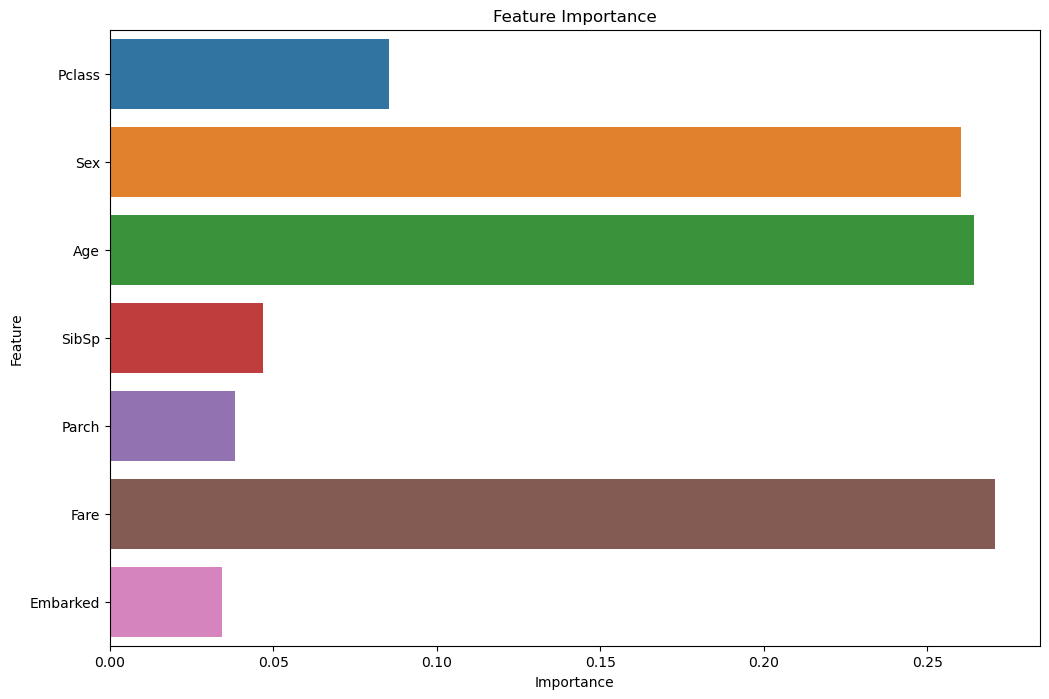

In [104]:
importances = final_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model Prediction

In [105]:
import joblib

# Load the model from the file
loaded_model = joblib.load('titanic_survival_model.pkl')

# Now you can use the model to make predictions
# Example: making a prediction with the loaded model
sample_data = [[3, 1, 26.0, 0, 0, 7.92, 2]]  # Example input data
prediction = loaded_model.predict(sample_data)
print("Prediction:", prediction)

Prediction: [1]


C:\Users\anukr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
